In [90]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

In [91]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.90e-08
Time:                        14:50:38   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [92]:
dat

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [93]:
phm_df = pd.read_parquet('../feature_extracts/', engine='fastparquet')

In [94]:
phm_df

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,pin_kurtosis,po_avg_first_150,po_avg_last_150,po_avg_mid_300,po_avg_diff,po_size,po_total_avg,po_variance,po_skew,po_kurtosis
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,0.752526,-0.992838,1.158301,0.111272,-2.151139,571.0,-0.149746,1.056277,0.571217,-1.485157
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,0.745448,-0.968079,1.102492,0.167849,-2.070571,571.0,-0.123757,1.060788,0.486906,-1.575010
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,1.119317,-0.948846,1.116603,0.151208,-2.065449,571.0,-0.122784,1.044903,0.499660,-1.561296
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,0.453443,-1.204169,0.695525,0.649105,-1.899694,571.0,-0.008986,1.041080,-0.163733,-1.727554
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,0.377425,-1.196517,0.688547,0.652022,-1.885065,571.0,-0.007443,1.033000,-0.165585,-1.718661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,1.131024,-1.016882,1.102886,0.207574,-2.119768,571.0,-0.113808,1.062574,0.484757,-1.594999
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,1.041519,-0.960488,1.123885,0.173077,-2.084373,571.0,-0.115101,1.050273,0.501856,-1.560801
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,0.819644,-0.977431,1.111738,0.173422,-2.089169,571.0,-0.120584,1.053842,0.498116,-1.566424
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,1.012201,-0.966088,1.104226,0.180022,-2.070315,571.0,-0.115785,1.054297,0.475711,-1.586136


In [95]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('fault_class ~ pdmp_variance + pin_variance + po_variance + pdmp_total_avg + pin_total_avg + po_total_avg + individual + pdmp_avg_diff + pin_avg_diff + po_avg_diff', data=phm_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fault_class   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     2263.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:51:33   Log-Likelihood:                -79165.
No. Observations:               34145   AIC:                         1.584e+05
Df Residuals:                   34134   BIC:                         1.584e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        150.1726      2.532     59.316      0.000     145.210     155.135
pdmp_variance    -70.5668      2.130    -33.136      0.000     -74.741     -66.393
pin_variance     -90.3010      1.197    -75.469      0.000     -92.646     -87.956
po_variance       14.9779      2.503      5.983      0.000      10.071      19.884
pdmp_total_avg    39.0864      1.429     27.354      0.000      36.286      41.887
pin_total_avg    -33.2401      1.621    -20.512      0.000     -36.416     -30.064
po_total_avg     -53.3983      2.936    -18.190      0.000     -59.152     -47.644
individual        -0.7028      0.015    -45.470      0.000      -0.733      -0.672
pdmp_avg_diff      0.2326      0.068      3.402      0.001       0.099       0.367
pin_avg_diff     -17.7986      0.228    -77.996      0.000     -18.246     -17.351
po_avg_diff       12.0405      0.508     23.721      0.000      11.046      13.035
==============================================================================
Omnibus:                       73.899   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.868
Skew:                          -0.086   Prob(JB):                     6.73e-16
Kurtosis:                       2.860   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
phm_df_scalar = phm_df.drop(columns=['pdmp', 'pin', 'po', 'fault_class', 'index', 'po_size', 'pdmp_size', 'pin_size'])
pca = PCA(n_components=25)
principal_components = pca.fit(phm_df_scalar)
df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range (1,26)], index=phm_df_scalar.index)

print(principal_components)
df

PCA(n_components=12)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
1,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
2,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
3,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
4,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
...,...,...,...,...,...,...,...,...,...,...,...,...
34140,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
34141,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
34142,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
34143,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)


<class 'numpy.ndarray'>
(12,)
[3.13591490e+00 1.77017194e+00 2.63617460e-01 1.03081167e-01
 7.41854567e-02 6.44219480e-02 1.81088846e-02 1.29608934e-02
 3.60750012e-03 2.44356378e-03 1.73977767e-03 7.11400793e-04]


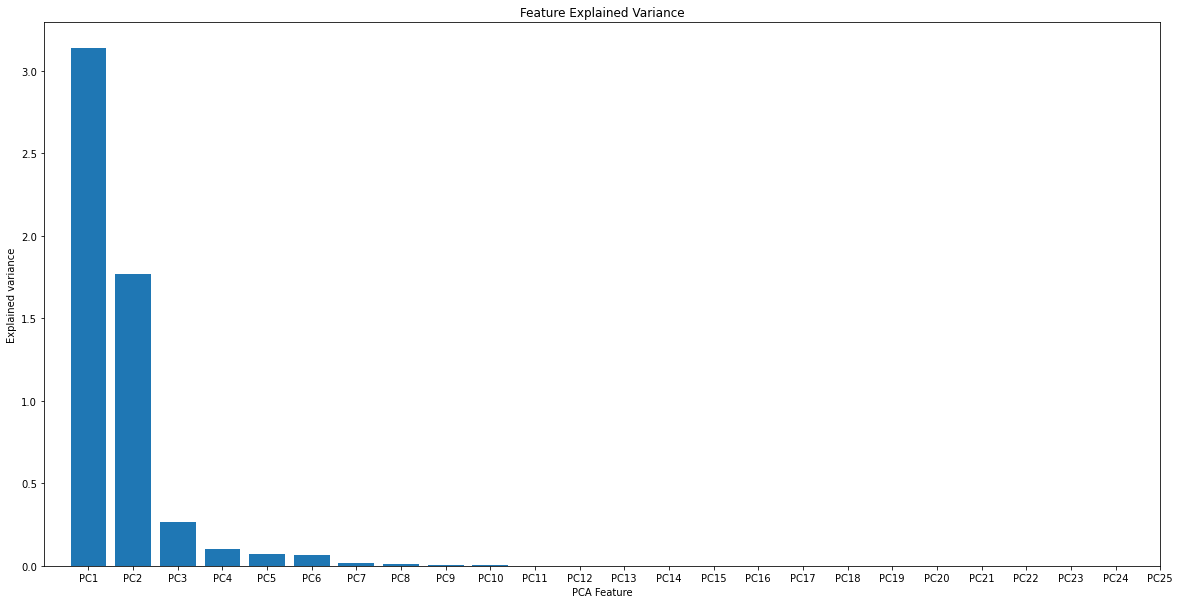

In [141]:
import matplotlib.pyplot as plt 

print(type(pca.explained_variance_))
print(pca.explained_variance_.shape)
print(pca.explained_variance_)


fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(20)

# Bar plot of explained_variance
ax.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

ax.set_xticks(range(1,26), labels = ['PC' + str(i) for i in range (1,26)])
ax.set_xlabel('PCA Feature')
ax.set_ylabel('Explained variance')
ax.set_title('Feature Explained Variance')
plt.show()

In [137]:
phm_df_scalar = pd.concat([phm_df, df], axis=1)
phm_df_scalar

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12)
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),PCA(n_components=12),P

In [139]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('fault_class ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6', data=phm_df_scalar).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fault_class   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                nan
Time:                        15:59:46   Log-Likelihood:                -87847.
No. Observations:               34145   AIC:                         1.757e+05
Df Residuals:                   34144   BIC:                         1.757e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9206      0.017    345.079      0.000       5.887       5.954
==============================================================================
Omnibus:                    36633.248   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2124.939
Skew:                           0.037   Prob(JB):                         0.00
Kurtosis:                       1.780   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""